In [1]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:/ML/python/data/labeled_data.csv",delimiter=',')

df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [2]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

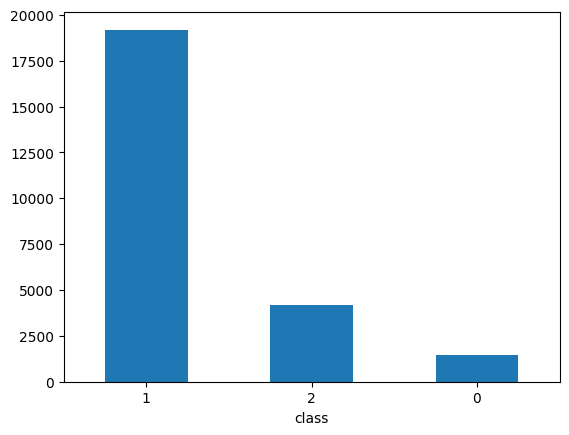

In [4]:
df['class'].value_counts().plot(kind='bar',rot=0)
plt.show()

In [5]:
df['class'] = df['class'].map({0:"offensive_language",1:"hate_speech",2:"neither"})
df['label'] = df['class']
df.drop("class",axis=1,inplace=True)

In [6]:
pretrained_model = "bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(pretrained_model)



In [7]:

### Quick websrape for stupid space stuff for tokenizer

import requests
from bs4 import BeautifulSoup
import html
url = "https://solarsystem.nasa.gov/planets/dwarf-planets/makemake/in-depth/"
r = requests.get(url)
print("Status of request:", r.status_code)


soup = BeautifulSoup(r.text,"html.parser")
results = soup.find(['div', 'p'])
for result in results:
    print(result.text)


Status of request: 200
 Skip to main content Missions Search All NASA MissionsA to Z List of MissionsUpcoming Launches and LandingsSpaceships and RocketsCommunicating with MissionsArtemisJames Webb Space TelescopeHubble Space TelescopeInternational Space StationOSIRIS-RExHumans in Space Why Go to SpaceAstronautsCommercial SpaceDestinationsSpaceships and RocketsLiving in SpaceEarth &amp; Climate Explore Earth ScienceClimate ChangeEarth, Our PlanetEarth Science in ActionEarth MultimediaEarth DataEarth Science ResearchersAbout NASA NASA's ImpactsCenters and FacilitiesDirectoratesOrganizationsPeople of NASACareersInternshipsOur HistoryDoing Business with NASAGet InvolvedContactLearning Resources For Kids and StudentsFor EducatorsFor Colleges and UniversitiesFor ProfessionalsScience for EveryoneRequest an Exhibit or SpeakerSTEM Engagement at NASAAeronautics Science in the AirNASA AircraftFlight InnovationSupersonic FlightAir Traffic SolutionsGreen Aviation TechDrones & YouTechnology Technol

In [8]:
text = [results.text for result in results]
space_text = " ".join(text)
print(space_text)



 Skip to main content Missions Search All NASA MissionsA to Z List of MissionsUpcoming Launches and LandingsSpaceships and RocketsCommunicating with MissionsArtemisJames Webb Space TelescopeHubble Space TelescopeInternational Space StationOSIRIS-RExHumans in Space Why Go to SpaceAstronautsCommercial SpaceDestinationsSpaceships and RocketsLiving in SpaceEarth &amp; Climate Explore Earth ScienceClimate ChangeEarth, Our PlanetEarth Science in ActionEarth MultimediaEarth DataEarth Science ResearchersAbout NASA NASA's ImpactsCenters and FacilitiesDirectoratesOrganizationsPeople of NASACareersInternshipsOur HistoryDoing Business with NASAGet InvolvedContactLearning Resources For Kids and StudentsFor EducatorsFor Colleges and UniversitiesFor ProfessionalsScience for EveryoneRequest an Exhibit or SpeakerSTEM Engagement at NASAAeronautics Science in the AirNASA AircraftFlight InnovationSupersonic FlightAir Traffic SolutionsGreen Aviation TechDrones & YouTechnology Technology Transfer & Spinoffs

In [9]:
tokens = tokenizer.tokenize(space_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("tokens: ",tokens)
print("token ids",token_ids)

tokens:  ['skip', 'to', 'main', 'content', 'missions', 'search', 'all', 'nasa', 'missions', '##a', 'to', 'z', 'list', 'of', 'missions', '##up', '##coming', 'launches', 'and', 'landings', '##space', '##ship', '##s', 'and', 'rockets', '##com', '##mun', '##ica', '##ting', 'with', 'missions', '##arte', '##mis', '##ja', '##mes', 'webb', 'space', 'telescope', '##hu', '##bble', 'space', 'telescope', '##int', '##ern', '##ation', '##al', 'space', 'station', '##osi', '##ris', '-', 'rex', '##hum', '##ans', 'in', 'space', 'why', 'go', 'to', 'space', '##ast', '##rona', '##uts', '##com', '##mer', '##cial', 'spaced', '##est', '##inations', '##space', '##ship', '##s', 'and', 'rockets', '##li', '##ving', 'in', 'space', '##ear', '##th', '&', 'amp', ';', 'climate', 'explore', 'earth', 'science', '##cl', '##imate', 'change', '##ear', '##th', ',', 'our', 'planet', '##ear', '##th', 'science', 'in', 'action', '##ear', '##th', 'multimedia', '##ear', '##th', 'data', '##ear', '##th', 'science', 'researchers', '

In [10]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [11]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [12]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [13]:
encoding = tokenizer.encode_plus(
  space_text,
  max_length=32,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

encoding.keys()


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])

In [14]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101, 13558,  2000,  2364,  4180,  6416,  3945,  2035,  9274,  6416,
         2050,  2000,  1062,  2862,  1997,  6416,  6279, 18935, 18989,  1998,
        16805, 23058,  9650,  2015,  1998, 12496,  9006, 23041,  5555,  3436,
         2007,   102])

In [15]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1]])

In [16]:

token_lens = []

for txt in df.tweet:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

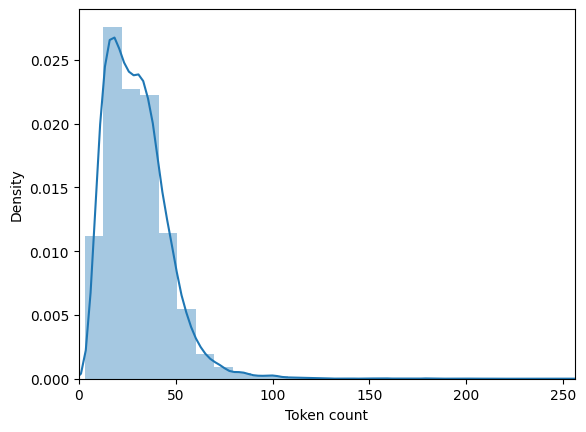

In [17]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [18]:

MAX_LEN = 120

class tweet_dataset:
    def __init__(self,tweet,targets,tokenizer,max_len):
        self.tweets = tweet
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __self__(self):
        return(self.tweet)


    def __getitem__(self,item):
        tweet = str(self.tweet[item])
        target = self.targets[item]
        
        encoding = self.tokenizer.encode_plus(
          tweet,
          add_special_tokens=True,
          max_length=self.max_len,
          return_token_type_ids=False,
          pad_to_max_length=True,
          return_attention_mask=True,
          return_tensors='pt',
    )
        return {
          'tweet_text': tweets,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
    }




In [19]:

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [20]:
df_train

,count,hate_speech,offensive_language,neither,tweet,label
8057,3,0,3,0,"Bitches ah have a baby &amp; be like ""don't cl...",hate_speech
313,3,0,0,3,"""@ayyee_ceee_: One mans trash &#128686; is ano...",neither
15568,3,0,3,0,RT @IKeepitRealer: ChrisBrown a bitch 4 hittin...,hate_speech
13789,3,0,3,0,"People comment on my fb statuses like ""How was...",hate_speech
17837,6,0,6,0,RT @TreLeKidd: Yo bitch is Gucci Mane RT @Jaba...,hate_speech
...,...,...,...,...,...,...
21575,3,0,0,3,The last at-bat at Yankee Stadium. Thanks for ...,neither
5390,3,0,3,0,@_bradleey LMFAOOOO yooo I lost my elevator pa...,hate_speech
860,3,1,2,0,"#porn,#android,#iphone,#ipad,#sex,#xxx, | #Ana...",hate_speech
15795,3,0,3,0,RT @JennyJohnsonHi5: Just when I thought Justi...,hate_speech


In [21]:

df_train.shape, df_val.shape, df_test.shape

((22304, 6), (1239, 6), (1240, 6))

In [22]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = tweet_dataset(
    tweet=df.tweet.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [23]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)